# IndabaX Ghana AutoInland Vehicle Insurance Claim by Data Science Network

The objective of this hackathon is to develop a predictive model that determines if a customer will submit a vehicle insurance claim in the next three months.

This solution will help streamline financial planning at AutoInland and allow them to better serve their customers by understanding which customers are likely to submit a claim.

## Loading required libraries

In [ ]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/My Drive/IndabaX Ghana AutoInland')
!ls

 Baseline.csv
 catboost_info
 cb_new.csv
 cb_prediction2.csv
 cb_prediction.csv
 Ghana_Indabax_AutoInland_Challenge.ipynb
 Ghana_Indabax_Challenge2.ipynb
 Indabax_AutoInland.ipynb
'Indabax_AutoInland_LGBM_feature_13 - Copy.ipynb'
'Indabax_Ghana_AutoInland 5th Place Solution.ipynb'
 indabax_NigerianStateNames.csv
 Indabax_Python_StarterNotebook.ipynb
 indabax_SampleSubmission.csv
 indabax_Test.csv
 indabax_Train.csv
 indabax_VariableDefinitions.csv
 lgbm_featselect10.csv
 lgbm_featselect12.csv
 lgbm_featselect15.csv
 lgbm_featselect20.csv
 lgbm_featselect25.csv
 lgbm_featselect8.csv
 lgbm_featselect.csv
 lgbm_fresh11.csv
 lgbm_fresh15.csv
 lgbm_fresh20.csv
 lgbm_fresh30.csv
 lgbm_fresh50.csv
 lgbm_fresh.csv
 lgbm_fresh_cv2.csv
 lgbm_fresh_cv3.csv
 lgbm_fresh_cv.csv
 lgbm_fresh_featselect.csv
 lgbm_last.csv
 lgbm_mappercv10.csv
 lgbm_mappercv10_feat13.csv
 lgbm_new1.csv
 lgbm_new2.csv
 lgbm_new3.csv
 lgbm_new4.csv
 lgbm_new5.csv
 lgbm_new6.csv
 lgbm_new7.csv
 lgbm_new8.csv
 lgbm_new.csv


### Loading the Dataset

In [ ]:
# Importing the data

try:
    train = pd.read_csv("indabax_Train.csv" , low_memory=False)
    test = pd.read_csv("indabax_Test.csv" , low_memory=False)
    ss = pd.read_csv("indabax_SampleSubmission.csv" , low_memory=False)
    ns = pd.read_csv('indabax_NigerianStateNames.csv')
    #var_def = pd.read_csv("../VariableDefinitions.csv" , low_memory=False)
except:
    !colab_download
    train = pd.read_csv("indabax_Train.csv" , low_memory=False)
    test = pd.read_csv("indabax_Test.csv" , low_memory=False)
    ss = pd.read_csv("indabax_SampleSubmission.csv" , low_memory=False)
    ns = pd.read_csv('indabax_NigerianStateNames.csv')
    #var_def = pd.read_csv("../autoinland_VariableDefinitions.csv" , low_memory=False)

### Exploratory Data Analysis

In [ ]:
train.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1


In [ ]:
test.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName
0,ID_01QM0NU,2010-10-23,2011-10-22,Female,46,2010-10-23,1,NaN,NaN,Ford,Abuja Municipal,Abuja-Municipal,Car Classic
1,ID_024NJLZ,2010-10-14,2011-10-13,Male,32,2010-10-14,1,NaN,NaN,NaN,Kosofe,Benue,Car Classic
2,ID_02NOVWQ,2010-08-29,2011-08-28,Female,45,2010-08-29,2,Saloon,Black,Honda,Wuse 11,Abuja,Car Classic
3,ID_02VSP68,2010-06-13,2011-06-12,Female,58,2010-06-13,1,Saloon,NaN,TOYOTA,NaN,NaN,CarSafe
4,ID_02YB37K,2010-07-01,2011-06-30,NaN,120,2010-07-01,1,Saloon,Red,Hyundai,Victoria Island,Lagos,Car Classic


In [ ]:
ss.head()

,ID,target
0,ID_01QM0NU,0
1,ID_024NJLZ,0
2,ID_02NOVWQ,0
3,ID_02VSP68,0
4,ID_02YB37K,0


In [ ]:
ns.head()

,LGA,State
0,Abadam,Borno State
1,Abaji,Federal Capital Territory
2,Abak,Akwa Ibom State
3,Abakaliki,Ebonyi State
4,Aba-North,Abia State


In [ ]:
print('Train shape:',train.shape,'\nTest shape:', test.shape, '\nsamplesubmission shape:',ss.shape,'\nNigerianStateNames shape:',ns.shape)

Train shape: (12079, 14) 
Test shape: (1202, 13) 
samplesubmission shape: (1202, 2) 
NigerianStateNames shape: (875, 2)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12079 entries, 0 to 12078
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      12079 non-null  object
 1   Policy Start Date       12079 non-null  object
 2   Policy End Date         12079 non-null  object
 3   Gender                  11720 non-null  object
 4   Age                     12079 non-null  int64 
 5   First Transaction Date  12079 non-null  object
 6   No_Pol                  12079 non-null  int64 
 7   Car_Category            8341 non-null   object
 8   Subject_Car_Colour      5117 non-null   object
 9   Subject_Car_Make        9603 non-null   object
 10  LGA_Name                5603 non-null   object
 11  State                   5591 non-null   object
 12  ProductName             12079 non-null  object
 13  target                  12079 non-null  int64 
dtypes: int64(3), object(11)
memory usage: 1.3+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      1202 non-null   object
 1   Policy Start Date       1202 non-null   object
 2   Policy End Date         1202 non-null   object
 3   Gender                  1161 non-null   object
 4   Age                     1202 non-null   int64 
 5   First Transaction Date  1202 non-null   object
 6   No_Pol                  1202 non-null   int64 
 7   Car_Category            830 non-null    object
 8   Subject_Car_Colour      505 non-null    object
 9   Subject_Car_Make        954 non-null    object
 10  LGA_Name                546 non-null    object
 11  State                   546 non-null    object
 12  ProductName             1202 non-null   object
dtypes: int64(2), object(11)
memory usage: 122.2+ KB


In [ ]:
# join train and test together
ntrain = train.shape[0]
ntest = test.shape[0]

all_data = pd.concat((train, test)).reset_index(drop=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (13281, 14)


In [ ]:
all_data.tail()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
13276,ID_ZTTHC5X,2010-12-05,2011-12-04,Male,67,2010-12-05,2,JEEP,Black,TOYOTA,Victoria Island,Lagos,Car Classic,NaN
13277,ID_ZUJAFUP,2010-01-14,2011-01-13,Male,43,2010-01-14,1,Saloon,Silver,Hyundai,Surulere,Lagos,Car Classic,NaN
13278,ID_ZWHCTUM,2010-07-26,2011-07-25,Male,30,2010-07-26,1,Truck,White,Iveco,Victoria Island,Lagos,CVTP,NaN
13279,ID_ZWQRL8L,2010-02-16,2011-02-15,Male,44,2010-02-16,2,Saloon,NaN,Nissan,Aba North,Aba-North,Car Classic,NaN
13280,ID_ZWZ92GU,2010-03-18,2011-03-17,Male,28,2010-03-18,1,Saloon,Silver,TOYOTA,NaN,NaN,Car Classic,NaN


In [ ]:
date_col = ['Policy Start Date','Policy End Date','First Transaction Date']
num_col = ['Age']
cat_col = [col for col in test.columns if col not in date_col+num_col]
cat_col

['ID',
 'Gender',
 'No_Pol',
 'Car_Category',
 'Subject_Car_Colour',
 'Subject_Car_Make',
 'LGA_Name',
 'State',
 'ProductName']

In [ ]:
cat_col.remove('ID')

In [ ]:
train.describe()

,Age,No_Pol,target
count,12079.000000,12079.000000,12079.000000
mean,42.234539,1.307227,0.120457
std,97.492565,0.733085,0.325509
min,-6099.000000,1.000000,0.000000
25%,35.000000,1.000000,0.000000
50%,41.000000,1.000000,0.000000
75%,50.000000,1.000000,0.000000
max,320.000000,10.000000,1.000000


In [ ]:
test.describe()

,Age,No_Pol
count,1202.000000,1202.000000
mean,43.792845,1.257903
std,19.986245,0.613510
min,-26.000000,1.000000
25%,35.000000,1.000000
50%,41.000000,1.000000
75%,50.000000,1.000000
max,120.000000,7.000000


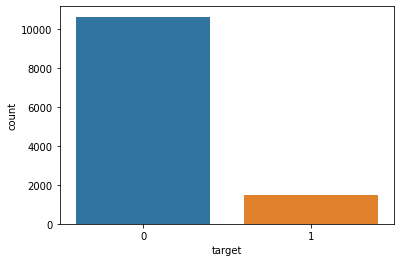

In [ ]:
sns.countplot(train.target)

The above plot reveals that we have an imbalanced dataset. This has to be catered for in the course of training the model.

#### Checking for missing values in the dataset

In [ ]:
# check for missing values in the train set
print("Are There Missing value in train? :",train.isnull().any().any())
print((train.isnull().sum()/train.shape[0])*100)

Are There Missing value in train? : True
ID                         0.000000
Policy Start Date          0.000000
Policy End Date            0.000000
Gender                     2.972100
Age                        0.000000
First Transaction Date     0.000000
No_Pol                     0.000000
Car_Category              30.946270
Subject_Car_Colour        57.637222
Subject_Car_Make          20.498386
LGA_Name                  53.613710
State                     53.713056
ProductName                0.000000
target                     0.000000
dtype: float64


In [ ]:
# check for missing values in the test set
print("Are There Missing value in test? :",test.isnull().any().any())
print((test.isnull().sum()/test.shape[0])*100)

Are There Missing value in test? : True
ID                         0.000000
Policy Start Date          0.000000
Policy End Date            0.000000
Gender                     3.410982
Age                        0.000000
First Transaction Date     0.000000
No_Pol                     0.000000
Car_Category              30.948419
Subject_Car_Colour        57.986689
Subject_Car_Make          20.632280
LGA_Name                  54.575707
State                     54.575707
ProductName                0.000000
dtype: float64


#### Some visual plot showing relationship between features

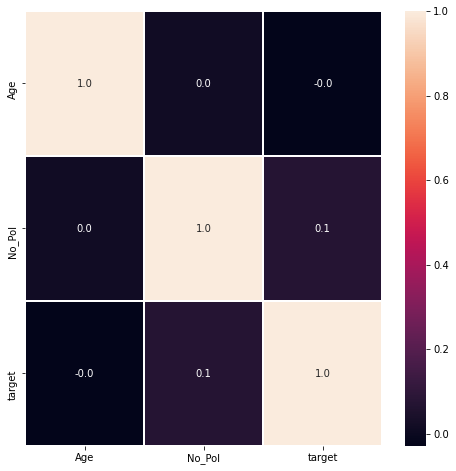

In [ ]:
f,ax=plt.subplots(figsize=(8,8))
sns.heatmap(train.corr(),annot=True,linewidth=.5,fmt='.1f',ax=ax)
plt.show()

In [ ]:
# checking relationship of  categorical features and numerical features
def check_categorical_relationship(cat_col,y_col,df):
    for feat in cat_col:
        plt.figure(figsize=(20,5))
        sns.barplot(df[feat],df[y_col])
        plt.show()
        print("\n \n \n ")

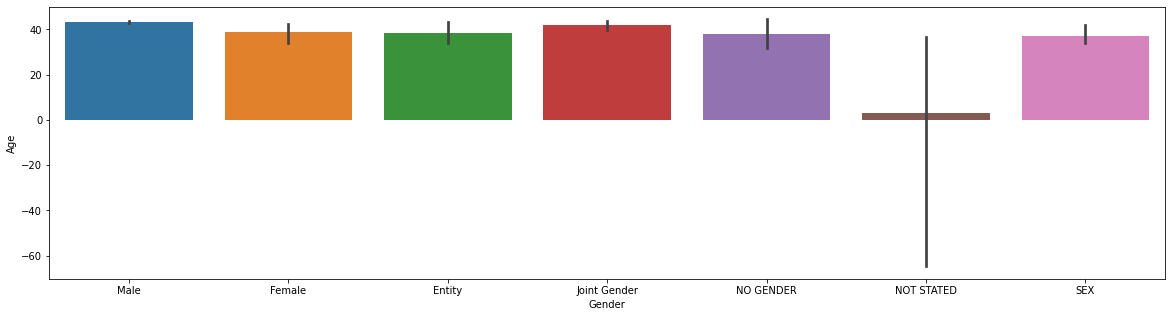

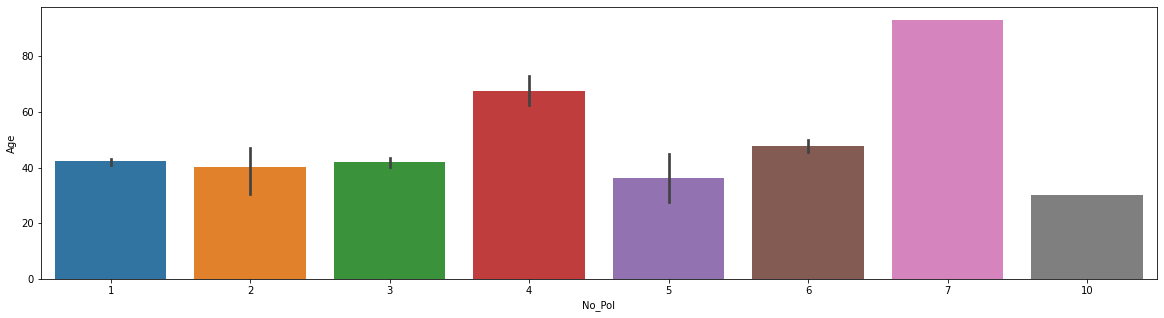

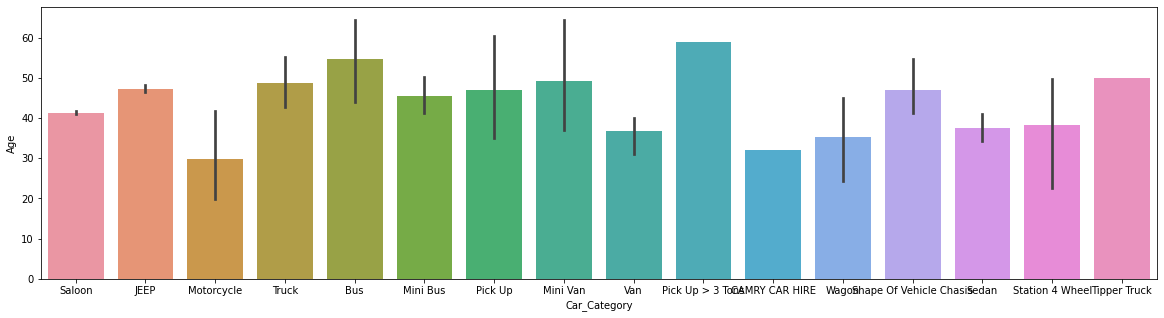

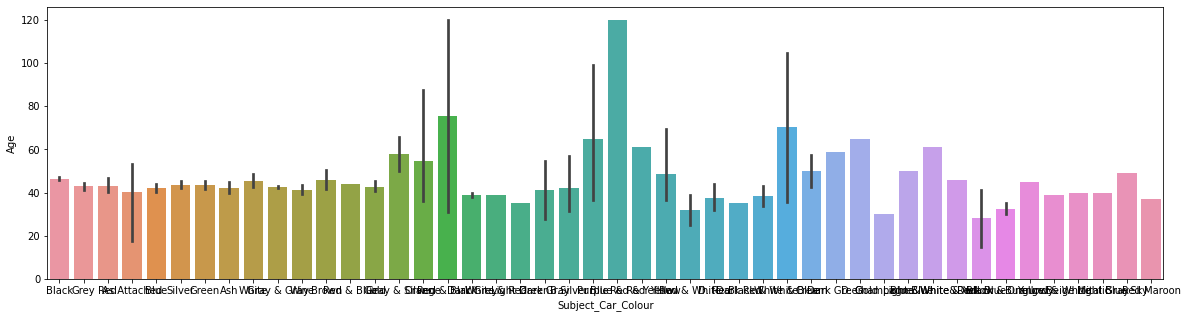

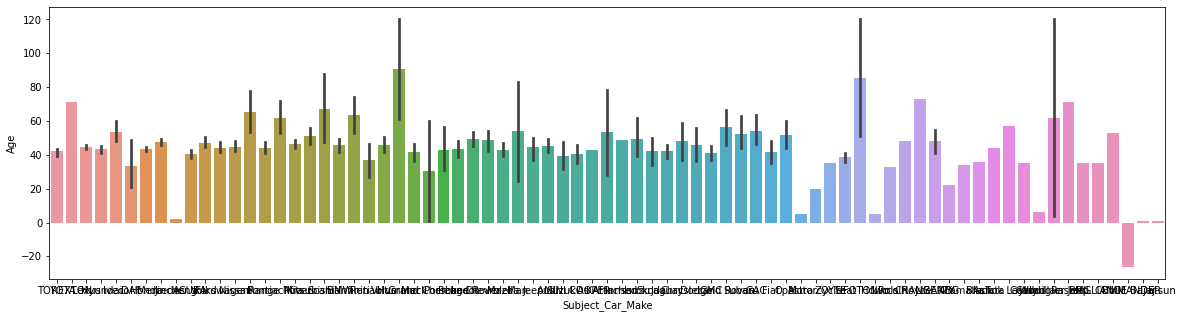

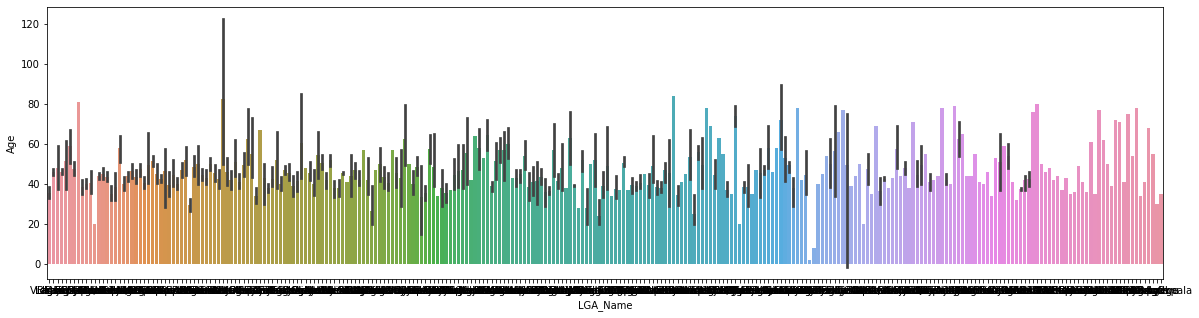

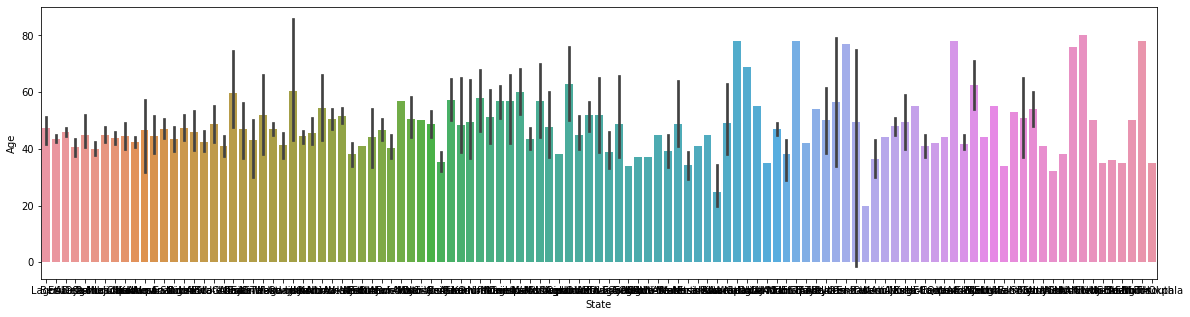

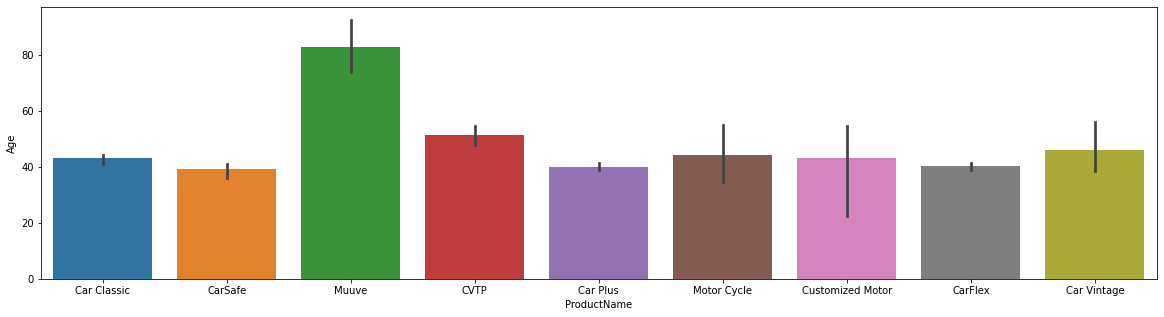

In [ ]:
check_categorical_relationship(cat_col,'Age',all_data)

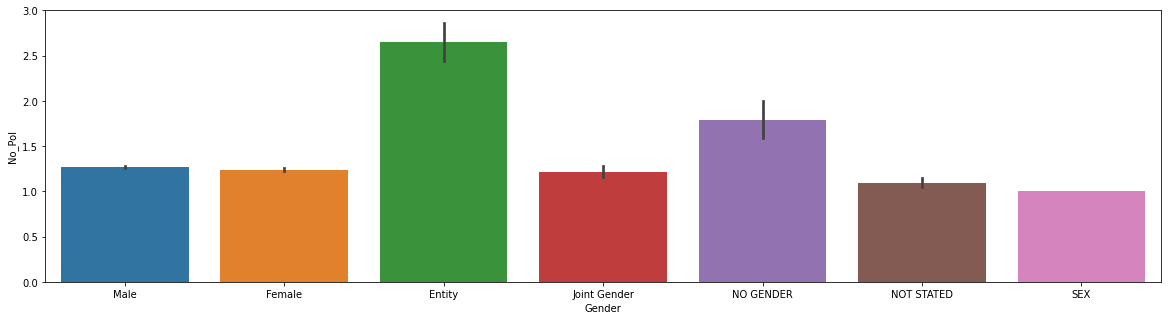

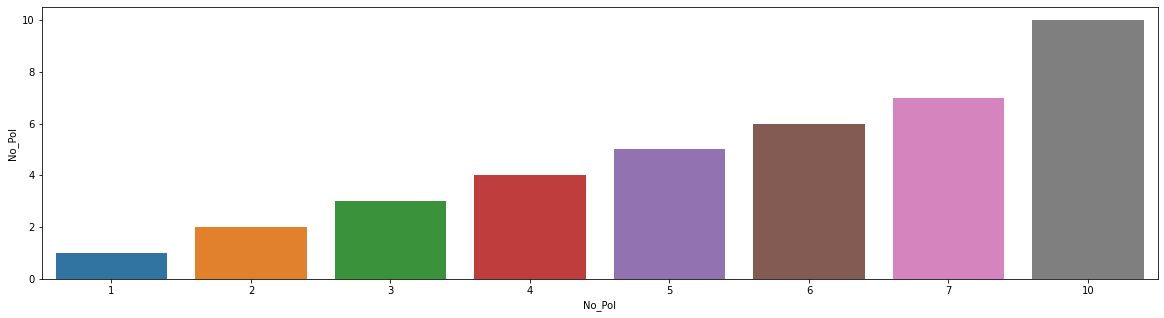

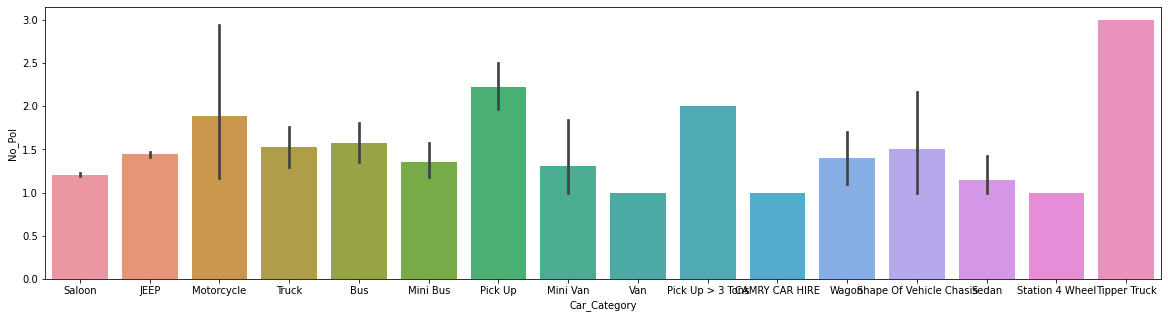

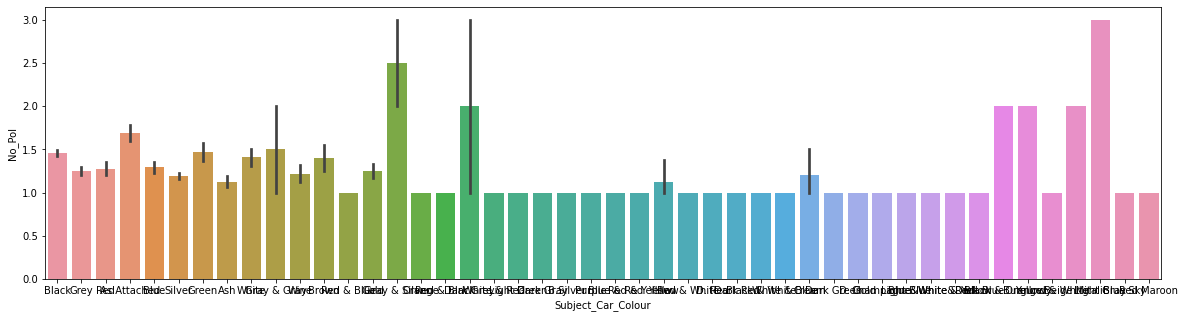

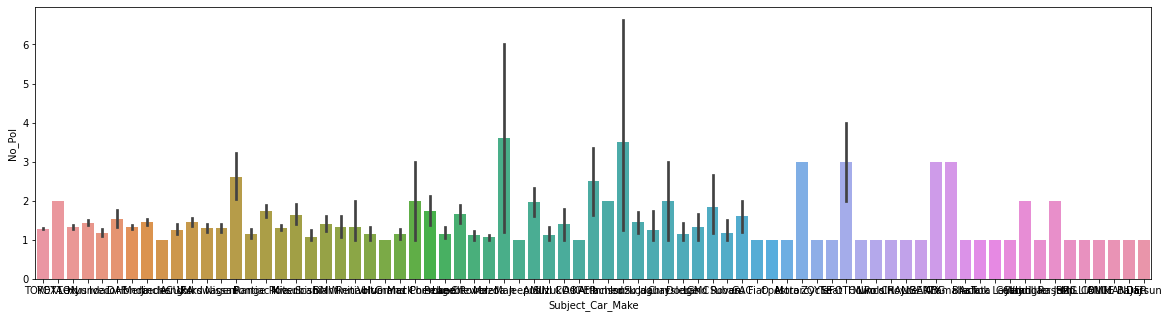

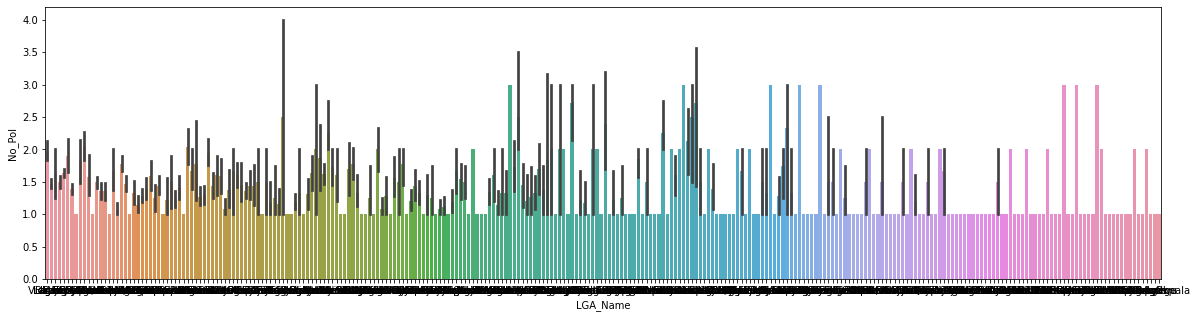

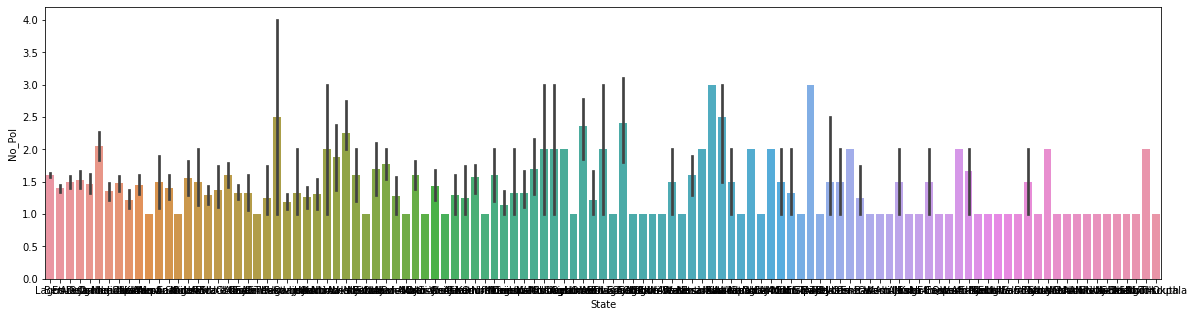

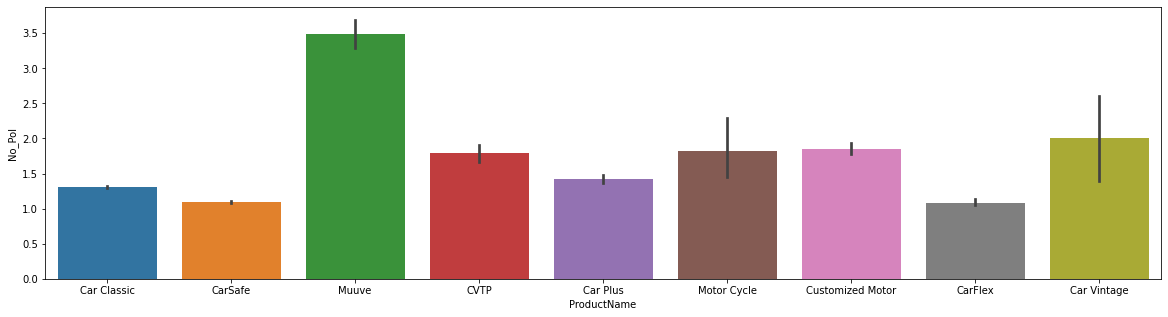

In [ ]:
check_categorical_relationship(cat_col,'No_Pol',all_data)

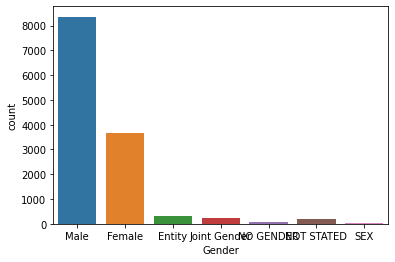

In [ ]:
# Gender distribution 
sns.countplot(all_data.Gender)

In [ ]:
all_data.Gender.unique()

array(['Male', 'Female', 'Entity', 'Joint Gender', nan, 'NO GENDER',
       'NOT STATED', 'SEX'], dtype=object)

### Data Processing

In [ ]:
train.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1


In [ ]:
# replacing all missing values with a string constant
all_data = all_data.fillna("no data")
all_data.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,no data,no data,Car Classic,0
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,no data,no data,Car Classic,1
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,no data,no data,Car Classic,0
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,no data,no data,no data,no data,no data,CarSafe,0
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,no data,no data,no data,Lagos,Lagos,Muuve,1


In [ ]:
#checking if missing values still exist
print("Are There still Missing value in data? :",all_data.isnull().any().any())
print((all_data.isnull().sum()/all_data.shape[0])*100)

Are There still Missing value in data? : False
ID                        0.0
Policy Start Date         0.0
Policy End Date           0.0
Gender                    0.0
Age                       0.0
First Transaction Date    0.0
No_Pol                    0.0
Car_Category              0.0
Subject_Car_Colour        0.0
Subject_Car_Make          0.0
LGA_Name                  0.0
State                     0.0
ProductName               0.0
target                    0.0
dtype: float64


### Dealing with date columns

In [ ]:
date_col

['Policy Start Date', 'Policy End Date', 'First Transaction Date']

In [ ]:
# assigning appropriate data type to the date features
for feat in date_col:
    all_data[feat] = pd.to_datetime(all_data[feat])

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13281 entries, 0 to 13280
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      13281 non-null  object        
 1   Policy Start Date       13281 non-null  datetime64[ns]
 2   Policy End Date         13281 non-null  datetime64[ns]
 3   Gender                  13281 non-null  object        
 4   Age                     13281 non-null  int64         
 5   First Transaction Date  13281 non-null  datetime64[ns]
 6   No_Pol                  13281 non-null  int64         
 7   Car_Category            13281 non-null  object        
 8   Subject_Car_Colour      13281 non-null  object        
 9   Subject_Car_Make        13281 non-null  object        
 10  LGA_Name                13281 non-null  object        
 11  State                   13281 non-null  object        
 12  ProductName             13281 non-null  object

In [ ]:
all_data.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,no data,no data,Car Classic,0
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,no data,no data,Car Classic,1
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,no data,no data,Car Classic,0
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,no data,no data,no data,no data,no data,CarSafe,0
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,no data,no data,no data,Lagos,Lagos,Muuve,1


In [ ]:
# extracting information in the date columns
def extract_date_info(df,cols,):
    for feat in cols:
        df[feat +'_year'] = df[feat].dt.quarter
        df[feat +'_day'] = df[feat].dt.day
        df[feat +'_month'] = df[feat].dt.month
        df[feat +'_quarter'] = df[feat].dt.quarter
    df.drop(columns=date_col,axis=1,inplace=True)

In [ ]:
extract_date_info(all_data,date_col)

In [ ]:
all_data.head()

,ID,Gender,Age,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target,Policy Start Date_year,Policy Start Date_day,Policy Start Date_month,Policy Start Date_quarter,Policy End Date_year,Policy End Date_day,Policy End Date_month,Policy End Date_quarter,First Transaction Date_year,First Transaction Date_day,First Transaction Date_month,First Transaction Date_quarter
0,ID_0040R73,Male,30,1,Saloon,Black,TOYOTA,no data,no data,Car Classic,0,2,14,5,2,2,13,5,2,2,14,5,2
1,ID_0046BNK,Female,79,1,JEEP,Grey,TOYOTA,no data,no data,Car Classic,1,4,29,11,4,4,28,11,4,4,29,11,4
2,ID_005QMC3,Male,43,1,Saloon,Red,TOYOTA,no data,no data,Car Classic,0,1,21,3,1,1,20,3,1,1,21,3,1
3,ID_0079OHW,Male,2,1,no data,no data,no data,no data,no data,CarSafe,0,3,21,8,3,3,20,8,3,3,21,8,3
4,ID_00BRP63,Entity,20,3,no data,no data,no data,Lagos,Lagos,Muuve,1,3,29,8,3,4,31,12,4,3,29,8,3


In [ ]:
all_data.Gender.unique()

array(['Male', 'Female', 'Entity', 'Joint Gender', 'no data', 'NO GENDER',
       'NOT STATED', 'SEX'], dtype=object)

##### Dealing with the Gender column

In [ ]:
mapper = {"Male":"M","Female":'F','Entity':'O','Joint Gender':'O','no data':'O','NO GENDER':'O','NOT STATED':'O','SEX':'O' }

In [ ]:
all_data.Gender = all_data.Gender.map(mapper)

In [ ]:
all_data.Gender.unique()

array(['M', 'F', 'O'], dtype=object)

In [ ]:
# replacing  missing values in the with a numeric constant just as a placeholder
all_data.target.replace(to_replace="no data", value=9999, inplace=True)

In [ ]:
all_data.target.isna().sum()

0

In [ ]:
all_data.target = all_data.target.astype(int)

In [ ]:
all_data.head()

,ID,Gender,Age,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target,Policy Start Date_year,Policy Start Date_day,Policy Start Date_month,Policy Start Date_quarter,Policy End Date_year,Policy End Date_day,Policy End Date_month,Policy End Date_quarter,First Transaction Date_year,First Transaction Date_day,First Transaction Date_month,First Transaction Date_quarter
0,ID_0040R73,M,30,1,Saloon,Black,TOYOTA,no data,no data,Car Classic,0,2,14,5,2,2,13,5,2,2,14,5,2
1,ID_0046BNK,F,79,1,JEEP,Grey,TOYOTA,no data,no data,Car Classic,1,4,29,11,4,4,28,11,4,4,29,11,4
2,ID_005QMC3,M,43,1,Saloon,Red,TOYOTA,no data,no data,Car Classic,0,1,21,3,1,1,20,3,1,1,21,3,1
3,ID_0079OHW,M,2,1,no data,no data,no data,no data,no data,CarSafe,0,3,21,8,3,3,20,8,3,3,21,8,3
4,ID_00BRP63,O,20,3,no data,no data,no data,Lagos,Lagos,Muuve,1,3,29,8,3,4,31,12,4,3,29,8,3


In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13281 entries, 0 to 13280
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   ID                              13281 non-null  object
 1   Gender                          13281 non-null  object
 2   Age                             13281 non-null  int64 
 3   No_Pol                          13281 non-null  int64 
 4   Car_Category                    13281 non-null  object
 5   Subject_Car_Colour              13281 non-null  object
 6   Subject_Car_Make                13281 non-null  object
 7   LGA_Name                        13281 non-null  object
 8   State                           13281 non-null  object
 9   ProductName                     13281 non-null  object
 10  target                          13281 non-null  int64 
 11  Policy Start Date_year          13281 non-null  int64 
 12  Policy Start Date_day           13281 non-null

### Encoding Categorical Variables

##### Checking for unique entries

In [ ]:
all_data.Car_Category.unique()

array(['Saloon', 'JEEP', 'no data', 'Motorcycle', 'Truck', 'Bus',
       'Mini Bus', 'Pick Up', 'Mini Van', 'Van', 'Pick Up > 3 Tons',
       'CAMRY CAR HIRE', 'Wagon', 'Shape Of Vehicle Chasis', 'Sedan',
       'Station 4 Wheel', 'Tipper Truck'], dtype=object)

In [ ]:
all_data.Subject_Car_Colour.unique()

array(['Black', 'Grey', 'Red', 'no data', 'As Attached', 'Blue', 'Silver',
       'Green', 'Ash', 'White', 'Gray & Gray', 'Wine', 'Brown',
       'Red & Blue', 'Gold', 'Gray & Silver', 'Orange', 'Red & Black',
       'Dark Grey', 'White & Red', 'Light Green', 'Dark Gray', 'B.Silver',
       'Purple', 'Blue & Red', 'Red & Yellow', 'Yellow', 'Red & White',
       'D. Red', 'Dark Red', 'Black & White', 'White & Blue', 'Cream',
       'Dark Green', 'D. Gold', 'Champagne', 'Light Blue',
       'Blue&White&Red', 'White & Yellow', 'Dark Blue', 'Black & Orange',
       'Burgundy', 'Yellow & White', 'Beige Mitalic', 'Light Gray',
       'Blue Sky', 'Red Maroon'], dtype=object)

In [ ]:
all_data.Subject_Car_Make.unique()

array(['TOYOTA', 'no data', 'REXTON', 'Lexus', 'Hyundai', 'Iveco', 'DAF',
       'Honda', 'Mercedes', 'Jincheng', 'ACURA', 'Ford', 'Volkswagen',
       'Nissan', '.', 'Pontiac', 'Range Rover', 'Kia', 'Mitsubishi',
       'Scania', 'BMW', 'Infiniti', 'Renault', 'Volvo', 'Hummer', 'Mack',
       'Grand Cherokee', 'Porsche', 'Peugeot', 'Land Rover', 'Chevrolet',
       'Mazda', 'Man', 'Jeep', 'Audi', 'Suzuki', 'MINI COOPER', 'KA',
       'As Attached', 'Innson', 'Isuzu', 'Skoda', 'Jaguar', 'Chrysler',
       'Dodge', 'GMC', 'Land Rover.', 'Subaru', 'GAC', 'Fiat', 'Opel',
       'Astra', 'Motorcycle', 'ZOYTE', 'Seat', 'FOTON', 'Howo', 'Lincoln',
       'Rols Royce', 'CHANGAN', 'LIBERTY', 'ABG', 'Yamaha', 'Black',
       'Tata', 'Ashok Leyland', 'Geely', 'Caddillac', 'Wrangler Jeep',
       'Raston', 'MG', 'BRILLIANCE', 'Buik', 'COMMANDER', 'Bajaj',
       'Datsun'], dtype=object)

In [ ]:
all_data.LGA_Name.unique()

array(['no data', 'Lagos', 'Ikeja', 'Badagry', 'Eti-Osa',
       'Victoria Island', 'Ikoyi', 'Lagos Mainland', 'EFFURUN',
       'Abeokuta', 'Abuja Municipal', 'Yaba', 'Aguda', 'Surulere',
       'Oshodi-Isolo', 'Alimosho', 'Okpe, Delta State', 'Asaba',
       'IbadanCentral', 'Lekki', 'Ibeju/Lekki', 'OBANIKORO', 'Agege',
       'ISHERI', 'Kosofe', 'OGUN', 'Apapa', 'Ibadan South West',
       'Obia/Akpor', 'Ibadan South East', 'Sapele', 'Kaduna South',
       'Ikorodu', 'Amuwo-Odofin', 'Awka', 'GBAGADA', 'Port Harcourt',
       'Minna', 'Shomolu', 'Benin', 'Lagos Island', 'Central',
       'Ebute-Metta', 'Ketu', 'Uyo', 'Mushin', 'Katagum', 'ENUGU EAST',
       'Oredo', 'Abuja', 'Festac', 'Ipaja', 'Zaria ', 'Esan West',
       'Oluyole', 'Bwari', 'Obafemi-Owode', 'LGA', 'Orile-Iganmu',
       'Egbeda', 'Ido', 'Ifako-Ijaye ', 'Ibadan North', 'Oguta',
       'Jos North', 'Ajah', 'Ondo West', 'Kaduna North', 'Warri',
       'Aniocha South', 'Owerri', 'Awka South', 'Asokoro District',
     

In [ ]:
all_data.State.unique()

array(['no data', 'Lagos', 'Benue', 'Eti-Osa', 'Delta', 'Ogun',
       'Abuja-Municipal', 'Oshodi-Isolo', 'Ibeju-Lekki', 'Ibadan-West',
       'Obia-Akpor', 'Ibadan-East', 'Kaduna-South', 'Amuwo-Odofin',
       'Anambra', 'Rivers', 'Niger-State', 'Edo', 'Akwa-Ibom',
       'ENUGU-EAST', 'Abuja', 'Kaduna', 'Esan-West', 'Obafemi-Owode',
       'Orile-Iganmu', 'Ifako-Ijaye', 'Ibadan-North', 'Imo', 'Jos-North',
       'Ondo-West', 'Kaduna-North', 'Aniocha-South', 'Awka-South',
       'Ile-Oluji', 'Ijebu-Ode', 'Port-Harcourt', 'Nnewi-North',
       'Aboh-Mbaise', 'Oyo', 'Akoko-West', 'Warri-Central', 'Cross-River',
       'Jos-South', 'Onitsha-North', 'Osun', 'Ajeromi-Ifelodun',
       'Kano-Municipal', 'Ife-Central', 'Ilorin-West', 'Lagelu-North',
       'Owerri-Municipal', 'Nsit-Ubium', 'Udi-Agwu', 'Essien-Udim',
       'Owerri-West', 'Ondo', 'Ogbmosho-South', 'Umuahia-South',
       'ABULE-EGBA', 'Enugu-North', 'Ovia-SouthWest', 'Kebbi',
       'Ajegunle-State', 'Ekiti-West', 'Ogun-Water

In [ ]:
all_data.ProductName.unique()

array(['Car Classic', 'CarSafe', 'Muuve', 'CVTP', 'Car Plus',
       'Motor Cycle', 'Customized Motor', 'CarFlex', 'Car Vintage'],
      dtype=object)

#### Implementing Label Encoder

In [ ]:
le = preprocessing.LabelEncoder()

all_data.Gender = le.fit_transform(all_data.Gender)
all_data.Car_Category = le.fit_transform(all_data.Car_Category)
all_data.Subject_Car_Colour = le.fit_transform(all_data.Subject_Car_Colour)
all_data.Subject_Car_Make = le.fit_transform(all_data.Subject_Car_Make)
all_data.LGA_Name = le.fit_transform(all_data.LGA_Name)
all_data.State = le.fit_transform(all_data.State)
all_data.ProductName = le.fit_transform(all_data.ProductName)

In [ ]:
all_data.head()

,ID,Gender,Age,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target,Policy Start Date_year,Policy Start Date_day,Policy Start Date_month,Policy Start Date_quarter,Policy End Date_year,Policy End Date_day,Policy End Date_month,Policy End Date_quarter,First Transaction Date_year,First Transaction Date_day,First Transaction Date_month,First Transaction Date_quarter
0,ID_0040R73,1,30,1,8,4,68,270,113,1,0,2,14,5,2,2,13,5,2,2,14,5,2
1,ID_0046BNK,0,79,1,2,26,68,270,113,1,1,4,29,11,4,4,28,11,4,4,29,11,4
2,ID_005QMC3,1,43,1,8,32,68,270,113,1,0,1,21,3,1,1,20,3,1,1,21,3,1
3,ID_0079OHW,1,2,1,16,46,75,270,113,5,0,3,21,8,3,3,20,8,3,3,21,8,3
4,ID_00BRP63,2,20,3,16,46,75,165,74,8,1,3,29,8,3,4,31,12,4,3,29,8,3


In [ ]:
all_data.drop(columns=['ID'],inplace=True)

### Splitting the dataset

In [ ]:
#Get the new dataset
train_n = all_data[:ntrain]
test_n = all_data[ntrain:]

In [ ]:
test_n.drop("target",axis = 1,inplace = True)

In [ ]:
X= train_n.drop(columns=['target'])
y= train_n.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=45, stratify=y)

### Create Model - LightGBM

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
#from sklearn.utils import class_weight
#class_weight = dict(zip(np.unique(y), class_weight.compute_class_weight('balanced',np.unique(y),y))) 

In training this model, 8-fold cross validation on the training data was performed, thereby predicting on the test set after each iteration. The modal value of all the 8 predictions was then used to make the final submission.

Since an imbalanced dataset was involved, the `scale_pos_weight` hyperperameter was considered, which was manually tuned so as to balance the ratio of both positive and negative classes in the dataset.

In [ ]:
from sklearn.model_selection import StratifiedKFold
predictions = []
fold=StratifiedKFold(n_splits=8,shuffle=True, random_state=45)
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    classifier2=LGBMClassifier(learning_rate=0.1, n_estimators=800, scale_pos_weight = 5.0)
    classifier2.fit(X_train, Y_train)
    preds=classifier2.predict(X_test)
    predictions.append(classifier2.predict(test_n))

##### Feature Selection

Here, the key features that are relevant to creating the model was extracted, and then the model is retrained using these important features. This is done so as to improve the model performance.

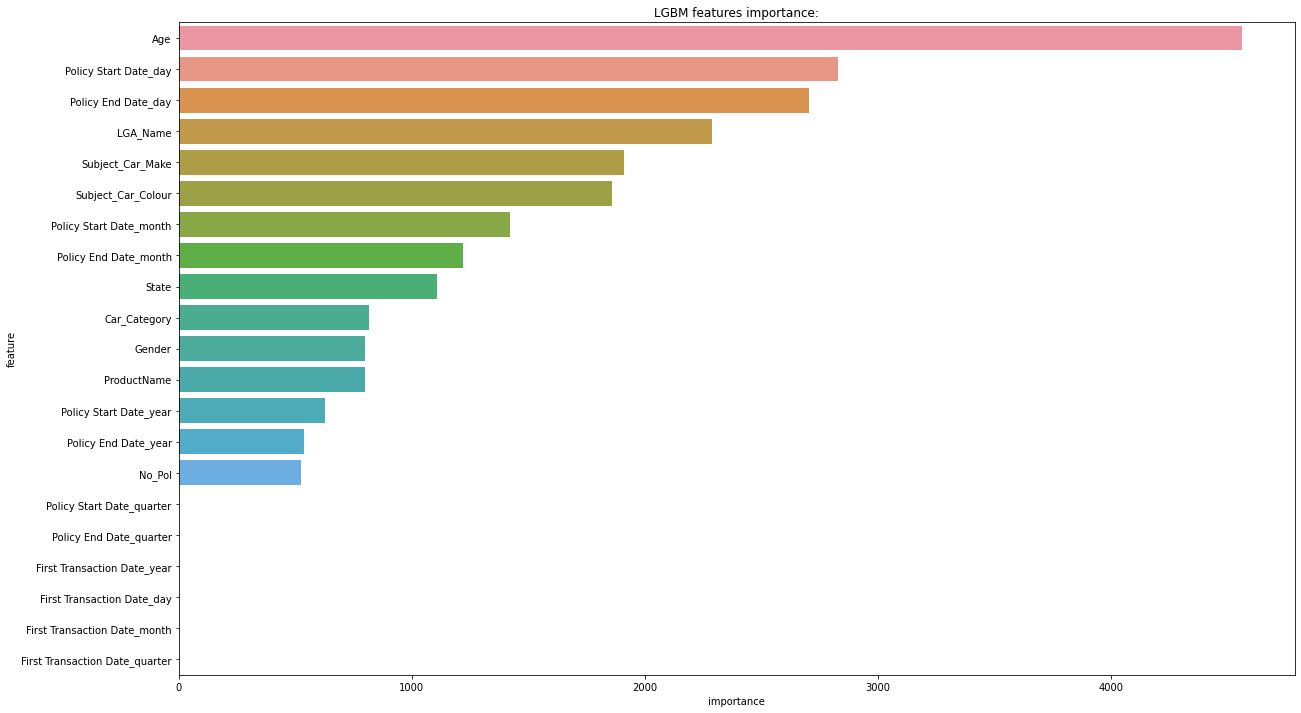

In [ ]:
feature_importance_df = pd.DataFrame(classifier2.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X_train.columns

plt.figure(figsize=(20, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False))
plt.title('LGBM features importance:');

From the above plot, it is obvious that some of the features are absolutely dummies in the model, after much training, the top 13 features are selected as the optimal features for retraining the model to yield a better performance.

In [ ]:
feature_importance_df = pd.DataFrame(classifier2.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X_train.columns
feature_importance = feature_importance_df.sort_values(by='importance',ascending=False).head(13)
feat_imp = feature_importance['feature'].to_list()
feat_imp

['Age',
 'Policy Start Date_day',
 'Policy End Date_day',
 'LGA_Name',
 'Subject_Car_Make',
 'Subject_Car_Colour',
 'Policy Start Date_month',
 'Policy End Date_month',
 'State',
 'Car_Category',
 'Gender',
 'ProductName',
 'Policy Start Date_year']

##### Training model with selected features

In [ ]:
from sklearn.model_selection import StratifiedKFold
predictions = []
fold=StratifiedKFold(n_splits=8,shuffle=True, random_state=45)
for train_index, test_index in fold.split(X[feat_imp],y):
    X_train, X_test = X[feat_imp].iloc[train_index], X[feat_imp].iloc[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    classifier2=LGBMClassifier(learning_rate=0.1, n_estimators=800, scale_pos_weight = 5.0, objective='binary')
    classifier2.fit(X_train, Y_train)
    preds=classifier2.predict(X_test)
    predictions.append(classifier2.predict(test_n[feat_imp]))

### Framing the predictions

In [ ]:
predictions = pd.DataFrame(predictions)

In [ ]:
predictions.T.head()

,0,1,2,3,4,5,6,7
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0


In [ ]:
predictions = predictions.mode()

In [ ]:
predictions = predictions.T
predictions

,0,1
0,0.0,NaN
1,0.0,NaN
2,0.0,NaN
3,0.0,NaN
4,0.0,NaN
...,...,...
1197,0.0,NaN
1198,0.0,NaN
1199,0.0,NaN
1200,0.0,NaN


In [ ]:
sub = predictions[0]
sub.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: 0, dtype: float64

In [ ]:
sub_file = ss.copy()
sub_file.target = sub

In [72]:
sub_file.to_csv('reproducibility_prediction1.csv',index=False)